In [36]:
import numpy as np
import itertools
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

# Standard Stars Calculations and Plots in R Filter

In [4]:
##m_inst
flux_R_star=[94873.8348,707297.631,72402.4977,538240.08,1224853.38,734891.097]
exptime_R_star=5.01
#flux in electrons and exptime in seconds
m_inst_R_star=[]
for i in flux_R_star:
    m_inst_R_star.append(-2.5*(np.log10(i/exptime_R_star)))
print('m_inst_R_star:' + str(m_inst_R_star))

m_inst_R_star:[-10.693271823123329, -12.874411194014073, -10.3997895565781, -12.577845771162146, -13.470615947760937, -12.915963150470374]


In [5]:
##sigma_inst
sigma_inst_R_star=[]
poisson_R_star=[8.1023104,12.8181416,7.92270532,11.9998865,14.700332,12.9897709]
for (i,j) in zip(flux_R_star,poisson_R_star):
    sigma_inst_R_star.append((2.5*j)/(np.log(10)*i))
print("sigma_inst_R_star:" + str(sigma_inst_R_star))

sigma_inst_R_star:[9.272284357444696e-05, 1.967646971072111e-05, 0.0001188076140853058, 2.4206133489795696e-05, 1.3030688354196716e-05, 1.9191230666989005e-05]


In [6]:
##sigma zeropoint
sigma_inst_R_star=[9.272284357444696e-05, 1.967646971072111e-05, 0.0001188076140853058, 2.4206133489795696e-05, 1.3030688354196716e-05, 1.9191230666989005e-05]
sigma_landolt_R=[3.384e-03,.01167,4.391e-03,3.625e-03,1.838e-03,7.07e-04]
sigma_zeropoint_R=[]
for (i,j) in zip(sigma_inst_R_star,sigma_landolt_R):
    sigma_zeropoint_R.append(math.sqrt((i**2)+(j**2)))
print('sigma_zeropoint_R:'+ str(sigma_zeropoint_R))

##zeropoint
m_landolt_R=[14.215,12.068,14.528,12.271,11.354,11.978]
m_inst_R_star=[-10.693271823123329, -12.874411194014073, -10.3997895565781, -12.577845771162146, -13.470615947760937, -12.915963150470374]
zeropoint_R=[]
for (i,j) in zip(m_landolt_R,m_inst_R_star):
    zeropoint_R.append(i-j)
print('zeropoint_R:' + str(zeropoint_R))

##numerator for weighted average zeropoint equation
zpt_upper_R=[]
for (a,b) in zip(zeropoint_R, sigma_zeropoint_R):
    zpt_upper_R.append((a)*(b)**(-2))
zpt_upper_R_sum=np.sum(zpt_upper_R)
print('zpt_upper_R_sum:' + str(zpt_upper_R_sum))

##denominator for weighted average zeropoint equation
zpt_lower_R=[]
for i in sigma_zeropoint_R:
    zpt_lower_R.append(i**2)
zpt_lower_R_sum=np.sum(zpt_lower_R)
print('zpt_lower_R_sum:' + str(zpt_lower_R_sum))

##weighted average zeropoint
avg_zpt_R=(zpt_upper_R_sum)/(zpt_lower_R_sum)
print('avg_zpt_R:' + str(avg_zpt_R))

sigma_zeropoint_R:[0.0033852700816508763, 0.011670016587968514, 0.004392606999170838, 0.0036250808179816526, 0.0018380461906162707, 0.0007072604211565309]
zeropoint_R:[24.90827182312333, 24.94241119401407, 24.927789556578098, 24.848845771162146, 24.824615947760936, 24.893963150470373]
zpt_upper_R_sum:62653778.66673603
zpt_lower_R_sum:0.0001839641789774175
avg_zpt_R:340575969816.532


In [7]:
#weighted average sigma zeropoint
avg_sigma_zeropoint_R= np.sqrt(1/zpt_lower_R_sum)
print('avg_sigma_zeropoint_R:' + str(avg_sigma_zeropoint_R))

avg_sigma_zeropoint_R:73.72815510587117


In [8]:
##m_observed
m_inst_R_star=[-10.693271823123329, -12.874411194014073, -10.3997895565781, -12.577845771162146, -13.470615947760937, -12.915963150470374]
avg_zpt_R=340575969816.532
m_obs_R=[]
for i in m_inst_R_star:
    m_obs_R.append(i+avg_zpt_R)
print('m_obs_R:' + str(m_obs_R))

m_obs_R:[340575969805.8387, 340575969803.6576, 340575969806.1322, 340575969803.95416, 340575969803.06134, 340575969803.616]


In [9]:
##m_residual
m_obs_R=[340575969805.8387, 340575969803.6576, 340575969806.1322, 340575969803.95416, 340575969803.06134, 340575969803.616]
m_landolt_R=[14.215,12.068,14.528,12.271,11.354,11.978]
m_residual_R=[]
for (i,j) in zip(m_obs_R,m_landolt_R):
    m_residual_R.append(i-j)
print('m_residual_R:' + str(m_residual_R))

m_residual_R:[340575969791.62366, 340575969791.5896, 340575969791.6042, 340575969791.68317, 340575969791.70734, 340575969791.638]


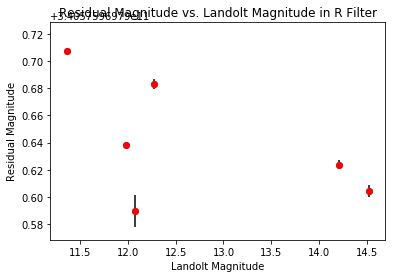

In [44]:
#Graph: m_residual_R vs m_landolt_R
m_residual_R=[340575969791.62366, 340575969791.5896, 340575969791.6042, 340575969791.68317, 340575969791.70734, 340575969791.638]
m_landolt_R=[14.215,12.068,14.528,12.271,11.354,11.978]
plt.scatter(m_landolt_R, m_residual_R)
sigma_m_R=[3.384e-03,.01167,4.391e-03,3.625e-03,1.838e-03,7.07e-04]
plt.xlabel('Landolt Magnitude')
plt.errorbar(m_landolt_R,m_residual_R, yerr=sigma_m_R, c='r',fmt='o', ecolor='black')
plt.ylabel('Residual Magnitude')
plt.title('Residual Magnitude vs. Landolt Magnitude in R Filter')
plt.show()

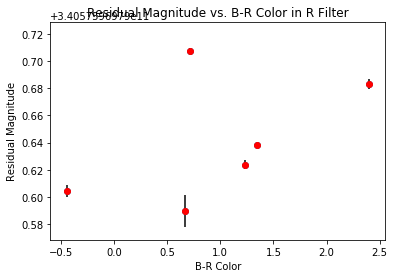

In [32]:
#Graph: m_residual_R vs B-R color
m_landolt_B=[15.443,12.735,14.082,14.671,12.073,13.325]
m_landolt_R=[14.215,12.068,14.528,12.271,11.354,11.978]
m_residual_R=[340575969791.62366, 340575969791.5896, 340575969791.6042, 340575969791.68317, 340575969791.70734, 340575969791.638]
#To get the B-R color, we subtracted the Landolt magnitude values of B and R:
color_star=[]
for (i,j) in zip(m_landolt_B,m_landolt_R):
    color_star.append(i-j)  
sigma_m_R=[3.384e-03,.01167,4.391e-03,3.625e-03,1.838e-03,7.07e-04]
plt.scatter(color_star, m_residual_R)
plt.xlabel('B-R Color')
plt.ylabel('Residual Magnitude')
plt.title('Residual Magnitude vs. B-R Color in R Filter')
plt.errorbar(color_star,m_residual_R, yerr=sigma_m_R, c='r', fmt='o', ecolor='black')
plt.show()

# Standard Stars Calculations and Plots in B Filter

In [12]:
#Standard Star in B Filter
##m_inst
flux_B_star=[80004.384,861693.936,250929.376,175260.475,1457373.04,525576.678]
exptime_B_star=15.01
#flux in electrons and exptime in seconds
m_inst_B_star=[]
for i in flux_B_star:
    m_inst_B_star.append(-2.5*(np.log10(i/exptime_B_star)))
print('m_inst_B_star:' + str(m_inst_B_star))

m_inst_B_star:[-9.316832733585509, -11.897430861129655, -10.557927035949564, -10.168258230407188, -12.467975097473666, -11.360638483256732]


In [13]:
##sigma_inst
sigma_inst_B_star=[]
poisson_B_star=[7.8506615,13.465060,10.031675,9.2539394,15.313187,11.939885]
for (i,j) in zip(flux_B_star,poisson_B_star):
    sigma_inst_B_star.append((2.5*j)/(np.log(10)*i))
print('sigma_inst_B_star:' + str(sigma_inst_B_star))

sigma_inst_B_star:[0.00010654100432609747, 1.6966004436684926e-05, 4.340565028889646e-05, 5.732802586103753e-05, 1.1408253809972718e-05, 2.4665412237238806e-05]


In [14]:
##sigma zeropoint
sigma_inst_B_star=[0.00010654100432609747, 1.6966004436684926e-05, 4.340565028889646e-05, 5.732802586103753e-05, 1.1408253809972718e-05, 2.4665412237238806e-05]
sigma_landolt_B=[5.385e-03,.01179,3.256e-03,4.459e-03,2.081e-03,5.813e-03]
sigma_zeropoint_B=[]
for (i,j) in zip(sigma_inst_B_star,sigma_landolt_B):
    sigma_zeropoint_B.append(math.sqrt((i**2)+(j**2)))
print('sigma_zeropoint_B:' + str(sigma_zeropoint_B))

##zeropoint
m_landolt_B=[15.443,12.735,14.082,14.671,12.073,13.325]
m_inst_B_star=[-9.316832733585509, -11.897430861129655, -10.557927035949564, -10.168258230407188, -12.467975097473666, -11.360638483256732]
zeropoint_B=[]
for (i,j) in zip(m_landolt_B,m_inst_B_star):
    zeropoint_B.append(i-j)
print('zeropoint_B:' + str(zeropoint_B))
    
##numerator for weighted average zeropoint equation
zpt_upper_B=[]
for (a,b) in zip(zeropoint_B, sigma_zeropoint_B):
    zpt_upper_B.append((a)*(b)**(-2))
zpt_upper_B_sum=np.sum(zpt_upper_B)
print('zpt_upper_B_sum:' + str(zpt_upper_B_sum))

##denominator for weighted average zeropoint equation
zpt_lower_B=[]
for i in sigma_zeropoint_B:
    zpt_lower_B.append(i**2)
zpt_lower_B_sum=np.sum(zpt_lower_B)
print('zpt_lower_B_sum:' + str(zpt_lower_B_sum))

##weighted average zeropoint
avg_zpt_B=(zpt_upper_B_sum)/(zpt_lower_B_sum)
print('avg_zpt_B:' +str(avg_zpt_B))

sigma_zeropoint_B:[0.005386053841691783, 0.011790012207173772, 0.0032562893069377303, 0.004459368509391114, 0.002081031270369331, 0.00581305232924673]
zeropoint_B:[24.759832733585508, 24.632430861129656, 24.639927035949565, 24.83925823040719, 24.540975097473666, 24.68563848325673]
zpt_upper_B_sum:11000851.567288624
zpt_lower_B_sum:0.00023662561991475133
avg_zpt_B:46490534588.99286


In [15]:
#weighted average sigma zeropoint
avg_sigma_zeropoint_B= np.sqrt(1/zpt_lower_B_sum)
print('avg_sigma_zeropoint_B:' + str(avg_sigma_zeropoint_B))

avg_sigma_zeropoint_B:65.00834617268666


In [16]:
##m_observed
m_inst_B_star=[-9.316832733585509, -11.897430861129655, -10.557927035949564, -10.168258230407188, -12.467975097473666, -11.360638483256732]
avg_zpt_B=46490534588.99286
m_obs_B=[]
for i in m_inst_B_star:
    m_obs_B.append(i+avg_zpt_B)
print('m_obs_B:' + str(m_obs_B))

m_obs_B:[46490534579.676025, 46490534577.09543, 46490534578.43493, 46490534578.8246, 46490534576.52489, 46490534577.63222]


In [17]:
##m_residual
m_obs_B=[46490534579.676025, 46490534577.09543, 46490534578.43493, 46490534578.8246, 46490534576.52489, 46490534577.63222]
m_landolt_B=[15.443,12.735,14.082,14.671,12.073,13.325]
m_residual_B=[]
for (i,j) in zip(m_obs_B,m_landolt_B):
    m_residual_B.append(i-j)
print('m_residual_B:' + str(m_residual_B))

m_residual_B:[46490534564.233025, 46490534564.36043, 46490534564.35293, 46490534564.1536, 46490534564.45189, 46490534564.30722]


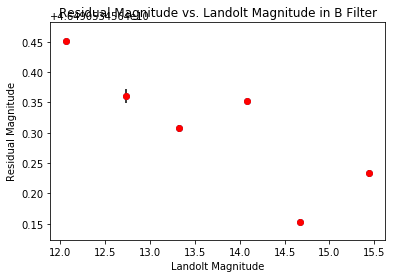

In [33]:
#Graph: m_residual_B vs m_landolt_B
m_residual_B=[46490534564.233025, 46490534564.36043, 46490534564.35293, 46490534564.1536, 46490534564.45189, 46490534564.30722]
m_landolt_B=[15.443,12.735,14.082,14.671,12.073,13.325]
plt.scatter(m_landolt_B, m_residual_B)
sigma_m_B=[5.385e-03,.01179,3.256e-03,4.459e-03,2.081e-03,5.813e-03]
plt.xlabel('Landolt Magnitude')
plt.ylabel('Residual Magnitude')
plt.errorbar(m_landolt_B,m_residual_B, yerr=sigma_m_B, c='r',fmt='o', ecolor='black')
plt.title('Residual Magnitude vs. Landolt Magnitude in B Filter')
plt.show()

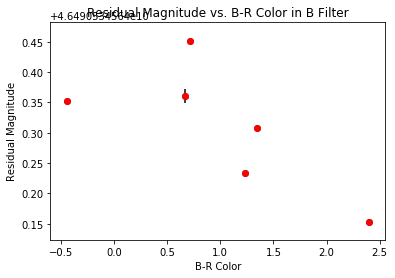

In [34]:
#Graph: m_residual_B vs B-R color
m_landolt_B=[15.443,12.735,14.082,14.671,12.073,13.325]
m_landolt_R=[14.215,12.068,14.528,12.271,11.354,11.978]
m_residual_B=[46490534564.233025, 46490534564.36043, 46490534564.35293, 46490534564.1536, 46490534564.45189, 46490534564.30722]
#To get the B-R color, we subtracted the Landolt magnitude values of B and R:
color_star=[]
for (i,j) in zip(m_landolt_B,m_landolt_R):
    color_star.append(i-j)  
sigma_m_B=[5.385e-03,.01179,3.256e-03,4.459e-03,2.081e-03,5.813e-03]
plt.scatter(color_star, m_residual_B)
plt.xlabel('B-R Color')
plt.ylabel('Residual Magnitude')
plt.title('Residual Magnitude vs. B-R Color in B Filter')
plt.errorbar(color_star,m_residual_B, yerr=sigma_m_B, c='r', fmt='o', ecolor='black')
plt.show()

# Galaxies Calculations in R Filter

In [20]:
##m_inst
flux_R_gal=[47729.25821,343837.235,356721.7403,427644.5028,333195.6815,577331.1543,575494.2467,1664834.001,147835.6984]
exptime_R_gal=240.01
#flux in electrons and exptime in seconds
m_inst_R_gal=[]
for i in flux_R_gal:
    m_inst_R_gal.append(-2.5*(np.log10(i/exptime_R_gal)))
print('m_inst_R_gal:' + str(m_inst_R_gal))

m_inst_R_gal:[-5.7463883696019895, -7.890308922006933, -7.93025060288619, -8.127133891950372, -7.8561750675164355, -8.452989142149406, -8.449529123360344, -9.60285399994286, -6.973874950956961]


In [21]:
##sigma_inst
sigma_inst_R_gal=[]
poisson_R_gal=[16.602042,17.309653,17.178391,17.582346,17.515895,17.930705,17.481048,19.309642,18.453490]
for (i,j) in zip(flux_R_gal,poisson_R_gal):
    sigma_inst_R_gal.append((2.5*j)/(np.log(10)*i))
print('sigma_inst_R_gal:' + str(sigma_inst_R_gal))

sigma_inst_R_gal:[0.00037766013444010454, 5.4658760136609904e-05, 5.228501361454927e-05, 4.463938970755847e-05, 5.707649413289859e-05, 3.372070855753854e-05, 3.298001121566154e-05, 1.2592953656475794e-05, 0.0001355262796062395]


In [22]:
##m_obs
avg_zpt_R=340575969816.532
m_inst_R_gal=[-5.7463883696019895, -7.890308922006933, -7.93025060288619, -8.127133891950372, -7.8561750675164355, -8.452989142149406, -8.449529123360344, -9.60285399994286, -6.973874950956961]
m_obs_R_gal=[]
for i in m_inst_R_gal:
    m_obs_R_gal.append(i+(avg_zpt_R))
print('m_obs_R_gal:' + str(m_obs_R_gal))

m_obs_R_gal:[340575969810.7856, 340575969808.64166, 340575969808.60175, 340575969808.40485, 340575969808.6758, 340575969808.079, 340575969808.08246, 340575969806.92914, 340575969809.5581]


In [23]:
#Sigma observed R
sig_inst_R=[.000377,5.466e-5,5.2284e-5,4.4639e-5,5.7076e-5,1.5337e-5,3.297e-5,1.2593e-5,.000135]
mean_sigma_zeropoint_R=73.72815510587117
sigma_R=[]
for i in sig_inst_R:
    sigma_R.append(math.sqrt((i**2)+(mean_sigma_zeropoint_R**2)))
print('sigma_R:' + str(sigma_R))

sigma_R:[73.72815510683503, 73.72815510589143, 73.72815510588971, 73.72815510588468, 73.72815510589326, 73.72815510587276, 73.72815510587854, 73.72815510587225, 73.72815510599477]


# Galaxies Calculations in B Filter

In [24]:
##m_inst
flux_B_gal=[3574.953741,37066.89395,38342.32112,45023.58943,34817.54636,58190.92713,62046.44851,162689.8503,23798.99639]
exptime_B_gal=120.01
#flux in electrons and exptime in seconds
m_inst_B_gal=[]
for i in flux_B_gal:
    m_inst_B_gal.append(-2.5*(np.log10(i/exptime_B_gal)))
print('m_inst_B_gal:' + str(m_inst_B_gal))

m_inst_B_gal:[-3.6851324769145006, -6.224421899386227, -6.261152410933345, -6.435556699239604, -6.156451816970916, -6.714094602303971, -6.783748730311052, -7.830357559475432, -5.7433530184560535]


In [25]:
##sigma_inst
sigma_inst_B_gal=[]
poisson_B_gal=[9.7964755,10.138286,10.194735,10.050529,10.854419,10.520810,10.6267709,11.4224678,9.82174243]
for (i,j) in zip(flux_B_gal,poisson_B_gal):
    sigma_inst_B_gal.append((2.5*j)/(np.log(10)*i))
print('sigma_inst_B_gal:' + str(sigma_inst_B_gal))

sigma_inst_B_gal:[0.0029752519612745386, 0.000296963219503653, 0.0002886834329297086, 0.00024236679817003914, 0.00033847978740551696, 0.0001962990604164546, 0.0001859553638100749, 7.622962843272062e-05, 0.00044807861538820494]


In [26]:
##m_obs
avg_zpt_B=46490534588.99286
m_inst_B_gal=[-3.6851324769145006, -6.224421899386227, -6.261152410933345, -6.435556699239604, -6.156451816970916, -6.714094602303971, -6.783748730311052, -7.830357559475432, -5.7433530184560535]
m_obs_B_gal=[]
for i in m_inst_B_gal:
    m_obs_B_gal.append(i+(avg_zpt_B))
print('m_obs_B_gal:' + str(m_obs_B_gal))

m_obs_B_gal:[46490534585.307724, 46490534582.76844, 46490534582.731705, 46490534582.557304, 46490534582.83641, 46490534582.27876, 46490534582.20911, 46490534581.1625, 46490534583.249504]


In [27]:
#Sigma observed B
sig_inst_B=[.002997,.0002969,.0002886,.0002424,.0003385,.0001963,.0001859,7.6229e-5,.0004481]
mean_sigma_zeropoint_B=65.00834617268666
sigma_B=[]
for i in sig_inst_B:
    sigma_B.append(math.sqrt((i**2)+(mean_sigma_zeropoint_B**2)))
print('sigma_B:' + str(sigma_B))

sigma_B:[65.00834624177016, 65.00834617336464, 65.00834617332727, 65.00834617313859, 65.00834617356794, 65.00834617298302, 65.00834617295246, 65.00834617273135, 65.00834617423102]


# Galaxies Plots

In [28]:
#Galaxies: B-R Color
m_obs_B_gal=[46490534585.307724, 46490534582.76844, 46490534582.731705, 46490534582.557304, 46490534582.83641, 46490534582.27876, 46490534582.20911, 46490534581.1625, 46490534583.249504]
m_obs_R_gal=[340575969810.7856, 340575969808.64166, 340575969808.60175, 340575969808.40485, 340575969808.6758, 340575969808.079, 340575969808.08246, 340575969806.92914, 340575969809.5581]
color_gal=[]
for (i,j) in zip(m_obs_B_gal,m_obs_R_gal):
    color_gal.append(i-j)
print('color_gal:' + str(color_gal))

color_gal:[-294085435225.47784, -294085435225.8732, -294085435225.87006, -294085435225.84753, -294085435225.83936, -294085435225.80023, -294085435225.87335, -294085435225.76666, -294085435226.3086]


In [35]:
#Sigma B-R

sig_B=[65.00834624177016, 65.00834617336464, 65.00834617332727, 65.00834617313859, 65.00834617356794, 65.00834617298302, 65.00834617295246, 65.00834617273135, 65.00834617423102]
sig_R=[73.72815510683503, 73.72815510589143, 73.72815510588971, 73.72815510588468, 73.72815510589326, 73.72815510587276, 73.72815510587854, 73.72815510587225, 73.72815510599477]
sigma_B_R=[]
for (x,y) in zip(sig_B,sig_R):
    sigma_B_R.append(math.sqrt((x**2)+(y**2)))
print('sigma_B_R:' + str(sigma_B_R))  

sigma_B_R:[98.2950961978643, 98.29509615191593, 98.29509615188992, 98.29509615176136, 98.29509615205177, 98.29509615164953, 98.29509615163366, 98.29509615148271, 98.29509615256643]


r_squared: 0.014918869189541328
slope: 0.612792944657326
intercept: 520789449641.52026
line of best fit: y= 0.6128x + 520789449642


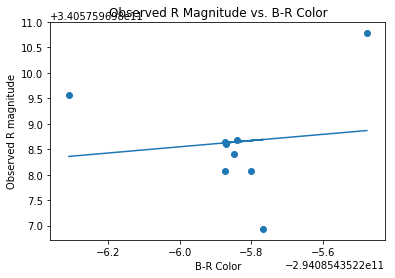

In [40]:
#Galaxies: Plot
color_gal=[-294085435225.47784, -294085435225.8732, -294085435225.87006, -294085435225.84753, -294085435225.83936, -294085435225.80023, -294085435225.87335, -294085435225.76666, -294085435226.3086]
m_obs_R_gal=[340575969810.7856, 340575969808.64166, 340575969808.60175, 340575969808.40485, 340575969808.6758, 340575969808.079, 340575969808.08246, 340575969806.92914, 340575969809.5581]

x= np.array(color_gal)
y= np.array(m_obs_R_gal)
m, b=np.polyfit(x, y, 1)

plt.scatter(color_gal, m_obs_R_gal)
plt.plot(x, m*x + b)

slope,intercept,r_value,p_value,std_err=stats.linregress(color_gal, m_obs_R_gal)
print('r_squared:', r_value**2 )
print('slope:', slope)
print('intercept:', intercept)
print('line of best fit: y= 0.6128x + 520789449642')

plt.ylabel('Observed R magnitude')
plt.xlabel('B-R Color')
plt.title('Observed R Magnitude vs. B-R Color')
plt.show()

r_squared: 0.649225223125218
slope: -12.060777880032397
intercept: -3206323142203.2925
line of best fit: y= -12.061x - 3206323142203


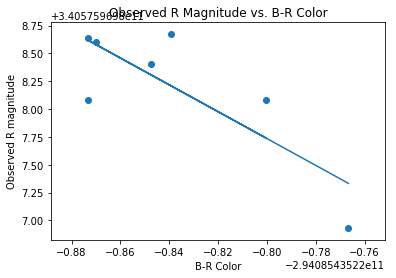

In [47]:
#Galaxies: Plot without outliers
color_gal=[-294085435225.8732, -294085435225.87006, -294085435225.84753, -294085435225.83936, -294085435225.80023, -294085435225.87335, -294085435225.76666]
m_obs_R_gal=[340575969808.64166, 340575969808.60175, 340575969808.40485, 340575969808.6758, 340575969808.079, 340575969808.08246, 340575969806.92914]

x= np.array(color_gal)
y= np.array(m_obs_R_gal)
m, b=np.polyfit(x, y, 1)

plt.scatter(color_gal, m_obs_R_gal)
plt.plot(x, m*x + b)

slope,intercept,r_value,p_value,std_err=stats.linregress(color_gal, m_obs_R_gal)
print('r_squared:', r_value**2 )
print('slope:', slope)
print('intercept:', intercept)
print('line of best fit: y= -12.061x - 3206323142203')

plt.ylabel('Observed R magnitude')
plt.xlabel('B-R Color')
plt.title('Observed R Magnitude vs. B-R Color')
plt.show()